In [1]:
import numpy as np

from torch.nn import MSELoss
from torch.optim import Adam
from torch.utils import data
from torch.autograd import Variable
from torchvision import transforms

import plot

from network import Net
from dataset import MNIBITE

In [2]:
loader = data.DataLoader(
    MNIBITE('mnibite', 13, transforms.Compose([
        transforms.ToTensor(),
    ])), batch_size=4, num_workers=4, shuffle=True)

In [3]:
model = Net()
criterion = MSELoss(size_average=False)
optimizer = Adam(model.parameters(), lr=.001)

for epoch in range(1, 30):
    epoch_loss = 0
    
    for step, (inputs, target) in enumerate(loader):
        inputs = Variable(inputs).unsqueeze(1)
        target = Variable(target).unsqueeze(1)
        
        optimizer.zero_grad()
        loss = criterion(model(inputs), target)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.data[0]
        
    print('epoch: {}, loss: {}'.format(epoch, epoch_loss))

epoch: 1, loss: 192711.8181833364
epoch: 2, loss: 17.76622381992638
epoch: 3, loss: 3.436463966034353
epoch: 4, loss: 3.4361496157944202
epoch: 5, loss: 3.428847840987146
epoch: 6, loss: 3.427837866358459
epoch: 7, loss: 3.4712522327899933
epoch: 8, loss: 3.408869373612106
epoch: 9, loss: 3.404924003407359
epoch: 10, loss: 3.3822697205469012
epoch: 11, loss: 3.3911016853526235
epoch: 12, loss: 3.3816248597577214
epoch: 13, loss: 3.3799998350441456
epoch: 14, loss: 3.376460243947804
epoch: 15, loss: 3.3504327666014433
epoch: 16, loss: 3.3349031470716
epoch: 17, loss: 3.3280459893867373
epoch: 18, loss: 3.3019924834370613
epoch: 19, loss: 3.3079937137663364
epoch: 20, loss: 3.282022993080318
epoch: 21, loss: 3.2735522408038378
epoch: 22, loss: 3.2632745280861855
epoch: 23, loss: 3.2586746914312243
epoch: 24, loss: 3.213876089081168
epoch: 25, loss: 3.225114564411342
epoch: 26, loss: 3.1888375841081142
epoch: 27, loss: 3.191984191071242
epoch: 28, loss: 3.153217784129083
epoch: 29, loss: 

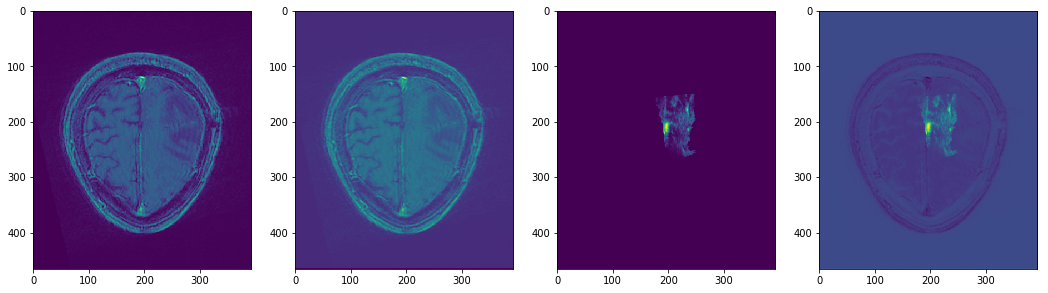

In [13]:
mr, us = iter(loader).next()

mr = Variable(mr).unsqueeze(1)
us = Variable(us).unsqueeze(1)
re = model(mr)

plot.show_images(np.concatenate([
    mr.data[0].numpy(),
    re.data[0].numpy(),
    us.data[0].numpy(),
    us.data[0].numpy()-re.data[0].numpy()]), 1, 4)

In [25]:
from skimage.util.shape import view_as_windows

view = view_as_windows(mr.data[0].numpy()[0], 7, 7)

In [31]:
patches = np.reshape(view, [-1,1, 7, 7])
np.shape(patches)

(3696, 1, 7, 7)

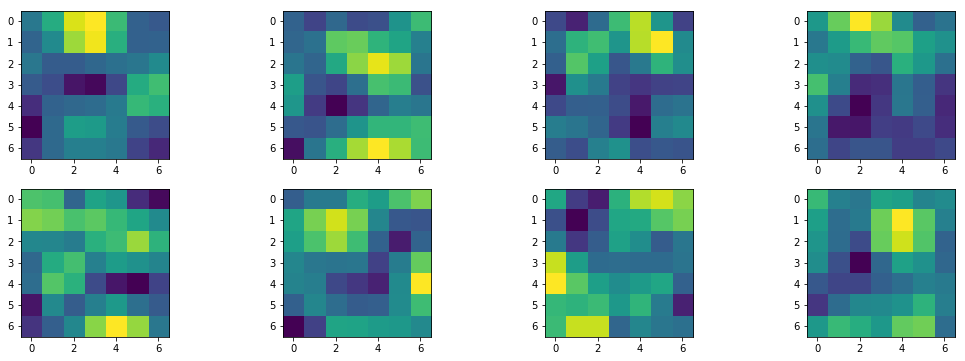

In [34]:
plot.show_images(np.concatenate(patches[100:108]), 2, 4)

In [35]:
np.shape(mr.data[0].numpy())

(1, 466, 394)

In [73]:
np.shape(np.sum(patches**2, (1, 2, 3)) > 1)

(3696,)

In [82]:
np.shape(patches[np.sum(patches**2, (1, 2, 3)) > .0005])

(0, 1, 7, 7)